### logistic_regression（逻辑回归）

#### 在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。为了完成这个预测任务，我们准备构建一个可以基于两次测试评分来评估录取可能性的分类模型。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 获取数据
path = "../data/classification/ex2data1.txt"
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# 此方法计算得到的值是bool类型的pandas.core.series.Series，
# admit = data['Admitted'].isin([1])
# admit
# type(admit)
# positive = data[data['Admitted'].isin([1])]
# positive

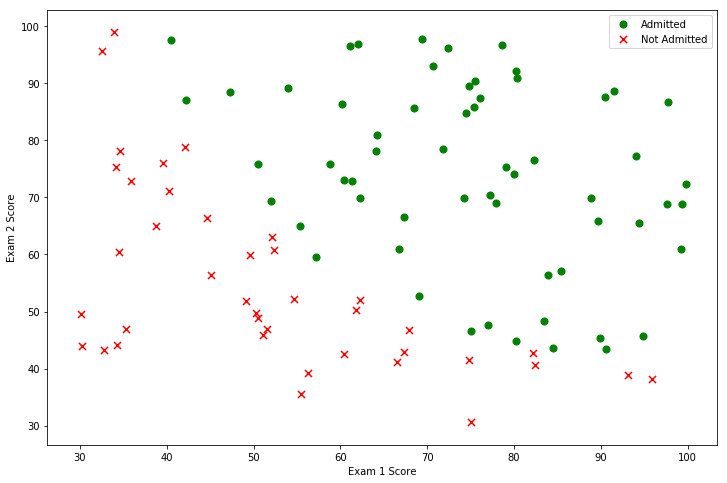

In [4]:
# 分别获取录取和为录取的同学的矩阵，用positive和negative来表示
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
# 获取绘画框
fig, ax = plt.subplots(figsize=(12,8))
# 进行绘制散点图
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50 ,c='green', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
# 分别给横坐标和纵坐标设置标签
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果

In [5]:
# 定义sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 做一个快速的检查，来确保它可以工作。

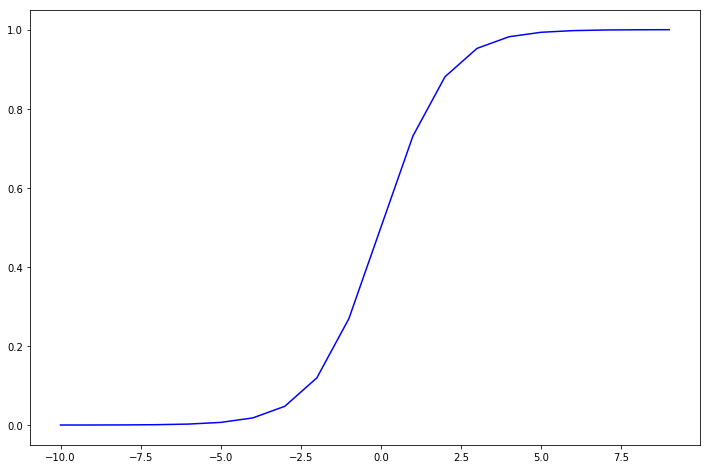

In [6]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'b')
plt.show()

### 通过损失函数的定义来编写损失函数

In [7]:
def cost(theta, X, y):
    # 将数据全部转化为np的矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # first为y=1时的损失函数
    # second为y=0时的损失函数
    first = np.multiply(-y , np.log(sigmoid(X * theta.T )))
    second = np.multiply((y-1), np.log(1-sigmoid(X * theta.T)))
    return np.sum(first + second) /(len(X))

### 接下来进行一些设置，和我们在练习1在线性回归的练习很相似。

In [8]:
# 给X添加一个常熟列，变成n+1
data.insert(0, 'Ones', 1)

# 获取X和y的矩阵和向量
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# 对数据类型进行转换，转换成np的矩阵
X = np.array(X.values)
y = np.array(y.values)
# 初始化theta的值，得到一个(1, 3)的向量
theta = np.zeros(3)

In [9]:
theta

array([0., 0., 0.])

In [10]:
# 查看他们的矩阵的行列数
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

### 计算初始情况下的损失值

In [11]:
cost(theta, X, y)

0.6931471805599453

In [12]:
print(np.matrix(theta).ravel())
# np.matrix将数组转化为np的矩阵变成二维  ravel将数据变成（1， n）的形式
# shape[1]则输出对应的原数组的长度
parameters = int(np.matrix(theta).ravel().shape[1])
print(parameters)

[[0. 0. 0.]]
3


## gradient descent(梯度下降)

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # 获取参数的个数
    parameters = int(theta.ravel().shape[1])
    # 初始化梯度值为0矩阵
    grad = np.zeros(parameters)
    # 计算残差值，也就是公式中的h(x)
    error = sigmoid(X * theta.T) -y
    
    for i in range(parameters):
        # 每一轮循环的偏导值 X[:, i]表示X(i)的列向量
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
        
    return grad   

### 我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

#### 数据和初始参数为0的梯度下降法的结果。

In [14]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [15]:
# 导入优化函数
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [16]:
# 计算此theta下的损失函数的值
cost(result[0], X, y)

0.20349770158947458

### 编写预测函数

In [17]:
def predict(theta, X):
    # 通过X和theta来计算h(x)的值
    probability = sigmoid(X*theta.T)
    # h(x)>=0.5时赋值为1 h(x)<0.5时赋值为0，probability的顺序和X相同
    return [1 if x>=0.5 else 0 for x in probability]

In [18]:
# 将最优的theta带入预测函数进行预测得到预测结果
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
# 将预测值和实际值进行对比，同为1或者同为0则标记为1，否则标记为0
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# 列表的求和表示正确分类的数据，列表长度表示样本总数
accuracy = sum(correct) / len(correct) * 100
print('accuracy = {:.2f}%'.format(accuracy))

accuracy = 89.00%


In [19]:
# print(result[0][0])
# print(np.matrix(data)[:, 1])

### 我们的逻辑回归分类器预测正确，如果一个学生被录取或没有录取，达到89%的精确度。不坏！记住，这是训练集的准确性。我们没有保持住了设置或使用交叉验证得到的真实逼近，所以这个数字有可能高于其真实值

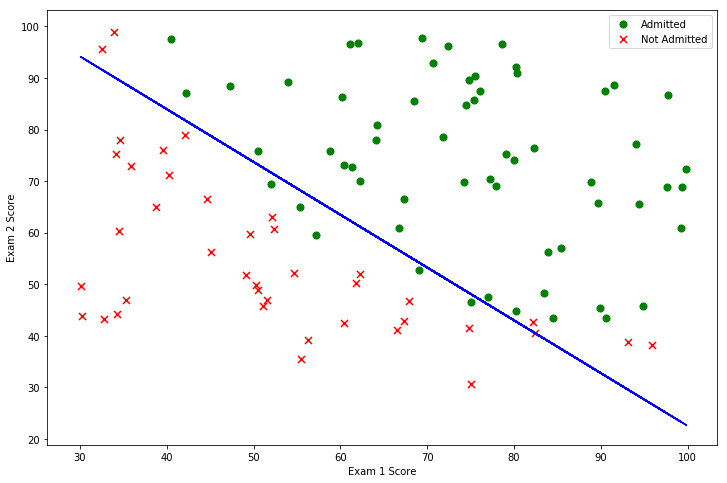

In [20]:
# 获取绘画框
fig, ax = plt.subplots(figsize=(12,8))
# 进行绘制散点图
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50 ,c='green', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
# 分别给横坐标和纵坐标设置标签
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
# 计算分类曲线，用蓝色线将其绘制到画布上
classify_line = (-1 * result[0][1] * np.matrix(data)[:, 1] -result[0][0]) /result[0][2]
ax.plot(np.matrix(data)[:, 1], classify_line, c="blue")
plt.show()

## 正则化逻辑回归

#### 正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力

### 设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。为了帮助你做出艰难的决定，你拥有过去芯片的测试数据集，从其中你可以构建一个逻辑回归模型。

In [21]:
# 先进行数据的获取和展示
path =  'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


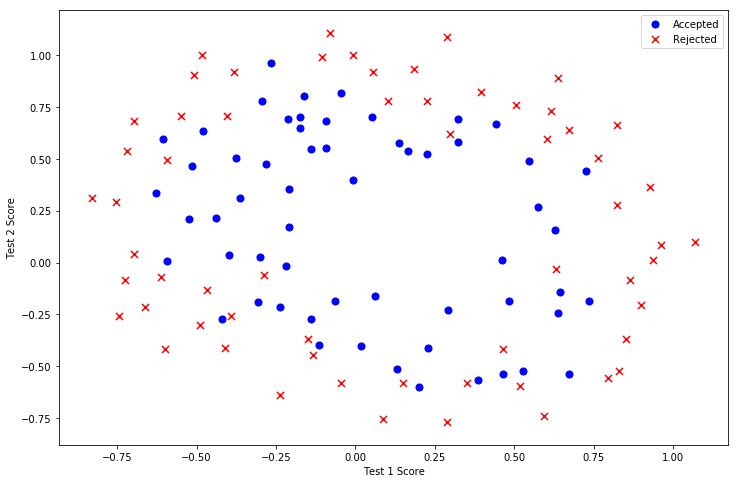

In [22]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

#### 这个数据看起来可比前一次的复杂得多。特别地，你会注意到其中没有线性决策界限，来良好的分开两类数据。一个方法是用像逻辑回归这样的线性技术来构造从原始特征的多项式中得到的特征。让我们通过创建一组多项式特征入手吧

In [23]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']
# 在第四列插入一列Ones数据 将数据转化为n+1
data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        # 将数据转化成x1的(i-j)次幂 * x2的j次幂的形式
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


### 现在，我们需要修改第1部分的成本和梯度函数，包括正则化项。首先是成本函数：

In [35]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # 这里的first和second和之前的损失函数的计算方式一样，不同的是后面的正则项
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    # 正则项的计算 因为惩罚项中theta0对应的x为常数1，因此无需添加theta到惩罚项中
    # theta[:, 1: theta.shape[1]] 项即为排除theta的操作
    # (learningRate / (2 * len(X))) 表示常数项系数 即 lambda / 2M
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:, 1: theta.shape[1]], 2))
    return np.sum(first - second) /len(X) +reg

### 如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对 进行正则化，所以梯度下降算法将分两种情形：对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得：

In [39]:
def gradientReg(theta, X, y, learningRate):
    # 前面的步骤和之前计算梯的过程相同
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        
        if(i == 0):
            # i == 0时表示theta0 , 由于求和项中没有theta0项，所以求导结果为0，和原来相同
            grad[i] = np.sum(term) /len(X)
        else:
            # 其他情况则要加上正则项进行惩罚
            grad[i] = (np.sum(term) /len(X) + (learningRate / len(X)) * theta[:, i])
    return grad

### 就像在第一部分中做的一样，初始化变量。

In [27]:
cols = data2.shape[1]
cols

12

In [28]:
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
X2 = np.array(X2.values)
y2 = np.array(y2.values)

In [32]:
X2.shape[1]
theta2 = np.zeros(X2.shape[1])

In [33]:
theta2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 让我们初始学习率到一个合理值。，果有必要的话（即如果惩罚太强或不够强）,我们可以之后再折腾这个。

In [59]:
learningRate = 0.01

In [60]:
# 加入正则项的损失值
costReg(theta2,X2, y2, learningRate)

0.6931471805599454

In [61]:
gradientReg(theta2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [62]:
# 通过SciPy的“optimize优化函数进行迭代求解theta
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([  0.68198356,   0.07496078,   5.09788087,  -5.44886114,
          4.52256002,   5.00557569,  -0.64788273, -14.96141273,
          0.98604077, -18.31547128,   4.5359483 ]), 68, 1)

In [63]:
# 计算准确率
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 88%


### 发现此时的准确率并不高，因此可以适当的调整lambda的值，进行合理的优化
### 发现在调整lambda的值后有如下变化
### lambda     1      accuracy      78%
### lambda    10     accuracy      66%
### lambda   0.01   accuracy      88%
### 增大lambda的值会影响精确度，但是可以防止过拟合

### 虽然我们实现了这些算法，值得注意的是，我们还可以使用高级Python库像scikit-learn来解决这个问题。

In [64]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
model.score(X2, y2)

0.6610169491525424

### 这个准确度和我们刚刚实现的差了好多，不过请记住这个结果可以使用默认参数下计算的结果。我们可能需要做一些参数的调整来获得和我们之前结果相同的精确度。